### Computer Vision

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
input=cv2.imread("input.jpg")
cv2.imshow("Hello World",input)
cv2.waitKey() # herhangi bir tuşa basana kadar bekle dedik, herhangi tuşa basınca resim kapanacak
cv2.destroyAllWindows()
# açılan resmi kesinlikle çarpıya basıp kapatmıyoruz, klavyeden herhangi bir tuşa basıp kapatıyoruz

In [ ]:
input
#resim aslında bir tensor matrix

array([[[12, 18, 31],
        [12, 18, 31],
        [11, 17, 30],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       ...,

       [[ 4,  7, 12],
        [ 4,  7, 12],
        [ 3,  7, 12],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 3,  6, 11],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 2,  5, 10],
        ...,
        [18, 23, 38],
        [18, 23, 38],
        [19, 24, 39]]], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from skimage import data

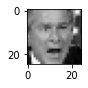

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(data.lfw_subset()[0,:,:],cmap='gray')

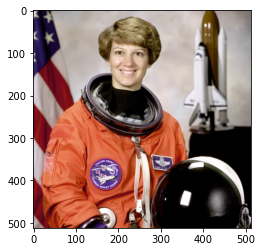

In [ ]:
plt.imshow(data.astronaut())
#bu resim skimage kütüphanesinden geldi

In [ ]:
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [ ]:
#yapacağımız işlemlerin hepsini siyah beyaza çevrilmiş görüntülerde yapmalıyız.
#o şekilde daha klay olmaktadır.

In [ ]:
import cv2
image=cv2.imread("input.jpg")
cv2.imshow("original",image)
cv2.waitKey()
sb=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #siyah beyaza çeviriyoruz
cv2.imshow("Siyah-Beyaz",sb)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#yukarıdaki kodu doğrudan siyah beyaz okumak üzere daha da kısaltacağız

In [ ]:
import cv2
image=cv2.imread("input.jpg",0)
cv2.imshow("original",image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
image=cv2.imread("input.jpg")
B,G,R=image[0,0]
print(B,G,R)

12 18 31


In [ ]:
B,G,R=cv2.split(image)
print(B.shape)
cv2.imshow("Red",R) #resmin içinde var olan kırmızı oranını ön plana çıkarır
cv2.imshow("Green",G)
cv2.imshow("Blue",B)
cv2.waitKey()
cv2.destroyAllWindows()
merged=cv2.merge([B+100, G, R+50])
cv2.imshow("Resmin Aslını Bozduk", merged)
cv2.waitKey()
cv2.destroyAllWindows()

(830, 1245)


### Edge Detection

In [ ]:
import cv2
import numpy as np
image = cv2.imread('input.jpg',0)

height,width = image.shape[:2]

sobel_x = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 5)

cv2.imshow('Rotated Image',image)
cv2.waitKey(0)
cv2.imshow('Sobel X',sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y',sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('sobel_OR',sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.waitKey(0)

canny = cv2.Canny(image,50,120)
cv2.imshow('Canny',canny)
cv2.waitKey(0)
 

cv2.destroyAllWindows()


In [ ]:
# bilgisayarın ön kamerasını açıp sketchmizi çiziyor
import cv2
import numpy as np

def sketch(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    img_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0)
    canny_edges = cv2.Canny(img_gray_blur,10,70)
    ret,mask = cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY_INV)
    return mask

cap = cv2.VideoCapture(0) # 0 yazınca ön kamerayı alıyor

while True:
    ret,frame = cap.read()
    cv2.imshow('Our live Sketcher',sketch(frame))
    if cv2.waitKey(1) == 13:  #programdan çıkmak için enter a basıyoruz
        break

cap.release()
cv2.destroyAllWindows()
print('done')


done


In [ ]:
# bir toplulukta aranan bir kişiyi bulmak
import cv2
import numpy as np

image=cv2.imread("WaldoBeach.jpg")

cv2.imshow("Where is Waldo", image)
cv2.waitKey(0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread("Waldo.jpg", 0)
cv2.imshow("Waldo", template)
cv2.waitKey(0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

top_left=maxLoc
bottom_right = (top_left[0] + 50, top_left[1]+50)
cv2.rectangle (image, top_left, bottom_right, (0,0,255),5)

cv2.imshow("Where is Waldo", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
#programdan çıkmak için boşluk tuşuna bas

In [ ]:
# data augmentation konusunu araştır!

In [ ]:
pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=222188734ea68d93fe98bf88915e1787b082a3ef092b4abb6f3c42b5ed37b548
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#resmin belli eksenlere göre simetrik görüntüsünü alıyoruz
import imutils
import cv2

image = cv2.imread('input.jpg')
cv2.imshow("Original", image)

flipped=cv2.flip(image,0)
cv2.imshow("Vertical Flip", flipped)

flipped=cv2.flip(image,1)
cv2.imshow("Horizontal Flip", flipped)


flipped=cv2.flip(image,-1)
cv2.imshow("Bot Flip", flipped)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0) # sıfır yazarsak kendimizi gösterir

while True:
    ret,frame=cap.read()
    if ret:
        cv2.imshow("Kendim", frame)
    else:
        break
    
    key=cv2.waitKey(10)
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()
# programdan çıkmak için q ya bas

In [ ]:
# videoyu analiz edeceğiz
import cv2
import numpy as np

cap=cv2.VideoCapture("airplanes.mp4")

while True:
    ret,frame=cap.read()
    if ret:
        cv2.imshow("Demo", frame)
    else:
        break
    
    key=cv2.waitKey(10)
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()


In [ ]:
#hsv insan gözünün görme şeklinin bilgisayara modellenmesi:

In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture("cars.mp4")

while True:
    ret,frame=cap.read()
    
    if ret:
        gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hsv=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        cv2.imshow("Demo", frame)
        cv2.imshow("Gray", gray)
        cv2.imshow("HSV", hsv)
        
    else:
        break
    
    key=cv2.waitKey(10)
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()


In [ ]:
# canlı resimde hareketi algılayan güvenlik kamerası:
# iki görüntü arasındaki farka bakıyor absdiff ile

In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture(0)
#cap=cv2.VideoCapture("cars.mp4")
#cap=cv2.VideoCapture("airplanes.mp4")

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)    
    frame1_blur = cv2.GaussianBlur(frame1_gray, (21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray, (21,21),0)        
    
    diff=cv2.absdiff(frame1_blur, frame2_blur)
    
    cv2.imshow("Motion", diff)
    frame1 = frame2
    
    ret,frame2=cap.read()
    
    if not ret:
        cap.release()
        break
        
    key=cv2.waitKey(10)
    if key==ord("q"):
        cap.release()
        break
        
cv2.destroyAllWindows()


In [ ]:
# kayıttaki videodaki hareketi algılayan güvenlik kamerası:
# iki görüntü arasındaki farka bakıyor absdiff ile

In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture("cars.mp4")

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)    
    frame1_blur = cv2.GaussianBlur(frame1_gray, (21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray, (21,21),0)        
    
    diff=cv2.absdiff(frame1_blur, frame2_blur)
    
    thresh=cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)[1]
    final=cv2.dilate(thresh, None, iterations=2)
    
    cv2.imshow("Motion", thresh)
    frame1 = frame2
    
    ret,frame2=cap.read()
    
    if not ret:
        break
        
    key=cv2.waitKey(10)
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()


In [ ]:
#Kayıtta hareket algılama:

In [ ]:
import cv2
import numpy as np

cap=cv2.VideoCapture("airplanes.mp4")

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)    
    frame1_blur = cv2.GaussianBlur(frame1_gray, (21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray, (21,21),0)        
    
    diff=cv2.absdiff(frame1_blur, frame2_blur)
    
    thresh=cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)[1]
    final=cv2.dilate(thresh, None, iterations=2)
    
    masked=cv2.bitwise_and(frame1, frame1, mask=thresh)
    
    white_pixels = np.sum(thresh)/255
    
    rows, cols=thresh.shape
    total=rows*cols
    
    if white_pixels > 0.01 * total:
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1, "Movement Detected", (10,50), font, 1, (0,0,255), 2, cv2.LINE_AA)
    
    cv2.imshow("Motion", frame1)
    frame1 = frame2    
    ret,frame2=cap.read()
    
    if not ret:
        break
        
    key=cv2.waitKey(10)
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()

### Contour Detection

In [ ]:
import cv2
import numpy as np

image=cv2.imread("bunchofshapes.jpg")
cv2.imshow("Input image", image)
cv2.waitKey(0) 

gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200)
cv2.imshow("Canny edges", edged)
cv2.waitKey(0)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.waitKey(0)

print("Number of Contours found: "+ str(len(contours)))

cv2.drawContours(image, contours, -1, (0,255 ,0), thickness=2)

cv2.imshow("Canny edges", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found: 4


### Blob Detection - Ayçiçeklerini sayıyor

In [ ]:
# Standard imports
import cv2
import numpy as np;
 
# Read image
image = cv2.imread("Sunflowers.jpg")
 
# Set up the detector with default par ameters.
detector =cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(image) 
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
print ("# of Sunflowers: "+str(len(blobs)))

# Show keypoints
cv2.imshow("Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

# of Sunflowers: 990


### Face and Eye Detection

In [ ]:
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('myself.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_1956\1494047580.py:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [ ]:
#!pip install opencv-contrib-python --user

In [ ]:
import cv2
import numpy as np
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face
cap = cv2.VideoCapture(0)
count = 0
while True:
    ret,frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame),(200,200))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        file_name_path = './faces/user/' + str(count) +'.jpg'
        cv2.imwrite(file_name_path,face)
        cv2.putText(face,str(count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow("Face Cropper",face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count ==100:
        break
cap.release()
cv2.destroyAllWindows()
print('Collecting Samples Complete')


<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_1120\2676880692.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

In [ ]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join
data_path = './faces/user/'
onlyfiles =[f for f in listdir(data_path) if isfile(join(data_path,f))]
Training_Data,Labels = [],[]
for i,files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images,dtype = np.uint8))
    Labels.append(i)
Labels = np.asarray(Labels,dtype = np.int32)
model = cv2.face.LBPHFaceRecognizer_create()
model.train(np.asarray(Training_Data),np.asarray(Labels))
print("Model Trained Succesfully")

Model Trained Succesfully


In [ ]:
import cv2
import numpy as np
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_extractor(img, size = 0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return img,[]
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi,(200,200))
    return img,roi
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    image,face = face_extractor(frame)
    try:
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        if results[1]<500:
            confidence = int(100 * (1-(results[1])/400))
            display_string = str(confidence) + '% Confident it is Hande'
        cv2.putText(image,display_string,(100,120),cv2.FONT_HERSHEY_COMPLEX,1,(255,120,150),2)
        if confidence > 75:
            cv2.putText(image,"Unlocked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.imshow("Face Recognition",image)
        else:
            cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            cv2.imshow("Face Recognition",image)
    except:
        cv2.putText(image,"No Face Found" ,(220,120),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.imshow("Face Recognition",image)
    if cv2.waitKey(1) == 13:
        cap.release()
        break
cap.release()
cv2.destroyAllWindows()